In [ ]:
# Se da acceso al drive desde Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Se cargan las diferentes librerias y dependencias necesarias
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

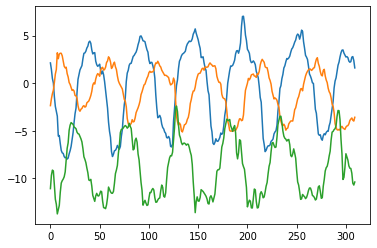

In [ ]:
# Ejemplo de la carga de un archivo *.json con las mediciones de un acelerómetro
RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Acelerometro/training/giro.3igkmkmi.ingestion-5489ddcb5b-b55sl.json"
dataframe = pd.read_json(RutaFile)
print(dataframe.to_string()) 
Valores = dataframe.iloc[:,:].values
print(Valores.shape)
print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [ ]:
# Se cargan los diferentes archivos *.json que se van a usar en el proceso
# de entrenamiento
import os
directory = '/content/gdrive/MyDrive/Colab Notebooks/Acelerometro/training/'
files = os.listdir(directory)
files.sort() 
cantidadFiles = len(files)
# Variable donde se almacenaron los datos leidos de los archivos *.json
Datos=np.zeros((cantidadFiles*300,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  Datos[i*300:(i+1)*300] = DatosOriNP[0:300]
  i+=1
print(Datos.shape)



(20700, 3)


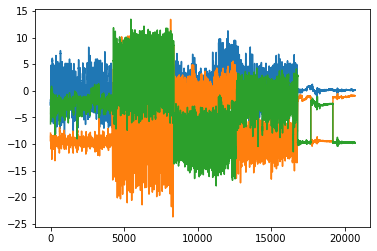

In [ ]:
# Visualización de la información capturada
plt.plot(Datos)

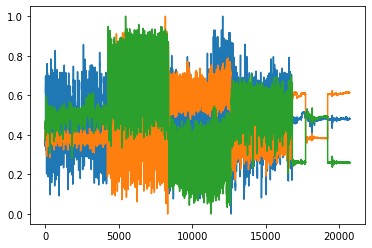

In [ ]:
# Se escalan los datos para se usados por el modelo 
scaler1 = MinMaxScaler()
scaler1.fit(Datos)
DatosN=scaler1.transform(Datos)
plt.plot(DatosN)

In [ ]:
# Se crea la variable para la entrada de entrenamiento del modelo 
# Las dimensiones depende del tamaño de la ventana de procesamiento de los datos.
# de la cantidad de patrones de entrenamiento que se generan y de la cantidad 
# de canales, 3 en este caso
Xtrain=np.zeros((230,90,3))

for i in range(230):
    Xtrain[i,:,0]=DatosN[i*90:(i+1)*90,0].T
    Xtrain[i,:,1]=DatosN[i*90:(i+1)*90,1].T
    Xtrain[i,:,2]=DatosN[i*90:(i+1)*90,2].T
  
print(Xtrain.shape)


(230, 90, 3)


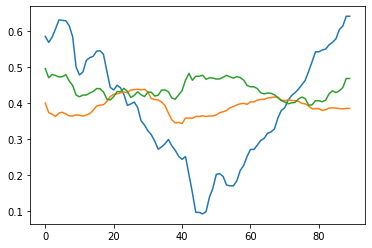

In [ ]:
# Se visualiza un patrón de entrenamiento
plt.plot(Xtrain[10,:,:])

In [ ]:
# Se definen las etiquetas para la salida del modelo
YtrainIni=np.zeros((230,1))
for i in range(46):
    YtrainIni[i]=0

for i in range(46,92):
    YtrainIni[i]=1

for i in range(92,138):
    YtrainIni[i]=2 

for i in range(138,184):
    YtrainIni[i]=3

for i in range(184,230):
    YtrainIni[i]=4  
print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.

In [ ]:
# Se convierten las etiquetas a codificación "one hot" que es la 
# usará el modelo
Ytrain=  keras.utils.to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 90, 16)            160       
                                                                 
 conv1d_49 (Conv1D)          (None, 90, 32)            1568      
                                                                 
 conv1d_50 (Conv1D)          (None, 90, 64)            6208      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 45, 64)           0         
 g1D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 2880)              0         
                                                                 
 dense_16 (Dense)            (None, 5)                 14405     
                                                     

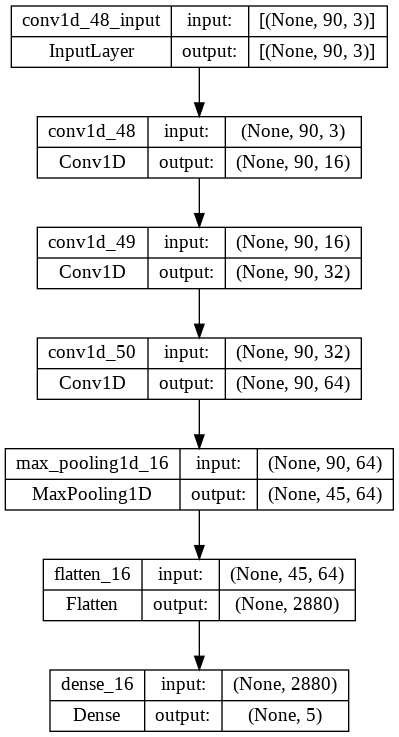

In [ ]:
# Se crea el modelo secuencial en Keras con capas convolucionales 1D
# y una capa clasificadora densa tipo softmax
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv1D(16, 3, activation="relu",padding="same", input_shape=(90,3)))
modelo.add(keras.layers.Conv1D(32, 3, activation="relu",padding="same"))
modelo.add(keras.layers.Conv1D(64, 3, activation="relu",padding="same"))
modelo.add(keras.layers.MaxPooling1D(pool_size=2,strides=2, padding='same'))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(5, activation = 'softmax'))
# Se muestra el resumen de la arquitectura del modelo
modelo.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Se compila y entrena el modelo
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo.fit(Xtrain,Ytrain, epochs=250,batch_size=None)


Epoch 1/250
8/8 [==============================] - 1s 10ms/step - loss: 1.5830 - accuracy: 0.3130
Epoch 2/250
8/8 [==============================] - 0s 8ms/step - loss: 1.4483 - accuracy: 0.3957
Epoch 3/250
8/8 [==============================] - 0s 7ms/step - loss: 1.2542 - accuracy: 0.4087
Epoch 4/250
8/8 [==============================] - 0s 7ms/step - loss: 1.1323 - accuracy: 0.4913
Epoch 5/250
8/8 [==============================] - 0s 8ms/step - loss: 1.0940 - accuracy: 0.5478
Epoch 6/250
8/8 [==============================] - 0s 7ms/step - loss: 1.0300 - accuracy: 0.5957
Epoch 7/250
8/8 [==============================] - 0s 8ms/step - loss: 1.0078 - accuracy: 0.5217
Epoch 8/250
8/8 [==============================] - 0s 9ms/step - loss: 0.9106 - accuracy: 0.6217
Epoch 9/250
8/8 [==============================] - 0s 7ms/step - loss: 0.8609 - accuracy: 0.6000
Epoch 10/250
8/8 [==============================] - 0s 8ms/step - loss: 0.8102 - accuracy: 0.7043
Epoch 11/250
8/8 [==========

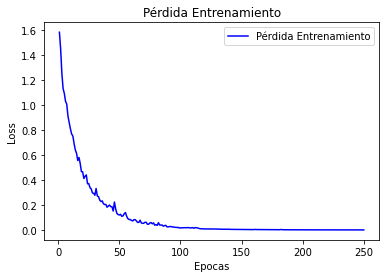

In [ ]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


(8100, 3)


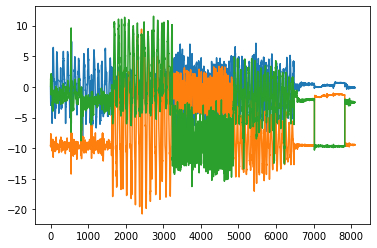

In [ ]:
# Se cargan los diferentes archivos *.json que se van a usar en el proceso
# de testeo

import os
directory = '/content/gdrive/MyDrive/Colab Notebooks/Acelerometro/testing/'
files = os.listdir(directory)
files.sort() 

cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*270,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*270:(i+1)*270] = DatosOriNP[0:270]
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

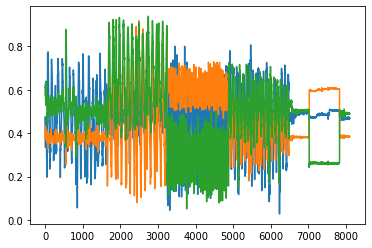

In [ ]:
# Se escalan los datos de testeo
DatosValN=scaler1.transform(DatosVal)
plt.plot(DatosValN)

In [ ]:
# Se crea la variable para el testeo del modelo 
# Las dimensiones depende del tamaño de la ventana de procesamiento de los datos.
# de la cantidad de patrones de entrenamiento que se generan y de la cantidad 
# de canales, 3 en este caso
XVal=np.zeros((90,90,3))

for i in range(90):
    XVal[i,:,0]=DatosValN[i*90:(i+1)*90,0].T
    XVal[i,:,1]=DatosValN[i*90:(i+1)*90,1].T
    XVal[i,:,2]=DatosValN[i*90:(i+1)*90,2].T

print(XVal.shape)


(90, 90, 3)


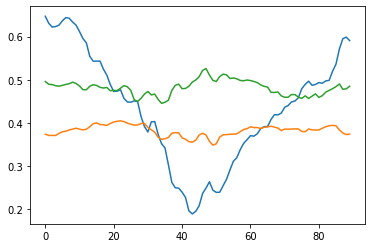

In [ ]:
# Se grafica uno de los patrones que se usarán en el testeo
plt.plot(XVal[10,:,:])

In [ ]:
# Se definen las etiquetas para la salida del modelo
YValIni=np.zeros((90,1))
for i in range(18):
    YValIni[i]=0

for i in range(18,36):
    YValIni[i]=1

for i in range(36,54):
    YValIni[i]=2 

for i in range(54,72):
    YValIni[i]=3 

for i in range(72,90):
    YValIni[i]=4  

print(YValIni)
# Se convierten las etiquetas a codificación "one hot" que es la 
# usará el modelo
YVal= keras.utils.to_categorical(YValIni)

print(YVal)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0

In [ ]:
# Se evalua el modelo con los datos de testeo
modelo.evaluate(XVal, YVal)

3/3 [==============================] - 0s 5ms/step - loss: 0.2910 - accuracy: 0.9333


[0.29100504517555237, 0.9333333373069763]

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        18
           3       0.94      0.83      0.88        18
           4       0.94      0.94      0.94        18

    accuracy                           0.93        90
   macro avg       0.94      0.93      0.93        90
weighted avg       0.94      0.93      0.93        90

[[17  0  0  0  1]
 [ 0 17  0  1  0]
 [ 0  0 18  0  0]
 [ 3  0  0 15  0]
 [ 1  0  0  0 17]]


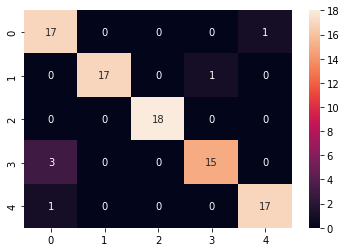

In [ ]:
# Se calculan las métricas del modelo con los datos de testeo incluyendo la 
# matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")